## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [26]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [27]:
train, test = keras.datasets.cifar10.load_data()

In [28]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [29]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [30]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [31]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [13]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_Accuracy", 
                          patience=5, 
                          verbose=1
                          )
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

W0718 21:56:51.315360 4530542016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 21:56:51.336048 4530542016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 21:56:51.340612 4530542016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0718 21:56:51.416795 4530542016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0718 21:56:51.580603 4530542016 deprecati

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 3s 69us/step - loss: 1.7322 - acc: 0.3986 - val_loss: 1.8294 - val_acc: 0.3791
Epoch 3/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.6085 - acc: 0.4382 - val_loss: 1.6744 - val_acc: 0.4195
Epoch 4/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.5345 - acc: 0.4622 - val_loss: 1.6217 - val_acc: 0.4312
Epoch 5/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.4800 - acc: 0.4828 - val_loss: 1.5968 - val_acc: 0.4436
Epoch 6/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.4345 - acc: 0.4975 - val_loss: 1.5690 - val_acc: 0.4522
Epoch 7/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.3971 - acc: 0.5102 - val_loss: 1.5329 - val_acc: 0.4612
Epoch 8/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.3605 - acc: 0.5243 - val_loss: 1.5326 - val_acc: 0.4605
Epoch 9/50
50000/50000 [============================

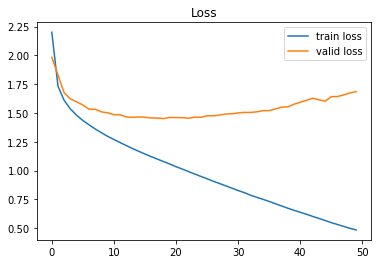

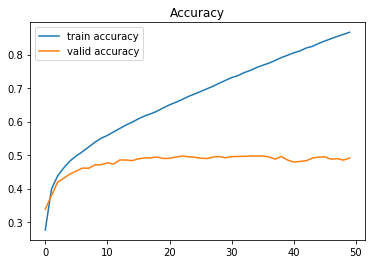

In [14]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

eary stop = 10

In [21]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_Accuracy", 
                          patience=10, 
                          verbose=1
                          )
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
__________

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 4s 72us/step - loss: 1.7404 - acc: 0.3956 - val_loss: 1.8099 - val_acc: 0.3878
Epoch 3/50
50000/50000 [==============================] - 4s 71us/step - loss: 1.6116 - acc: 0.4380 - val_loss: 1.6630 - val_acc: 0.4206
Epoch 4/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.5382 - acc: 0.4640 - val_loss: 1.6235 - val_acc: 0.4307
Epoch 5/50
50000/50000 [==============================] - 4s 72us/step - loss: 1.4844 - acc: 0.4817 - val_loss: 1.5894 - val_acc: 0.4490
Epoch 6/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.4357 - acc: 0.5000 - val_loss: 1.5682 - val_acc: 0.4503
Epoch 7/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.3997 - acc: 0.5112 - val_loss: 1.5468 - val_acc: 0.4603
Epoch 8/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.3632 - acc: 0.5247 - val_loss: 1.5249 - val_acc: 0.4678
Epoch 9/50
50000/50000 [============================

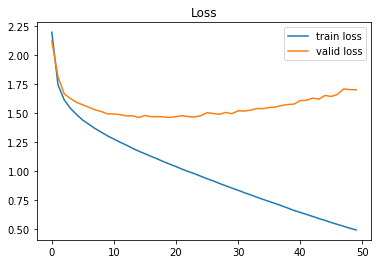

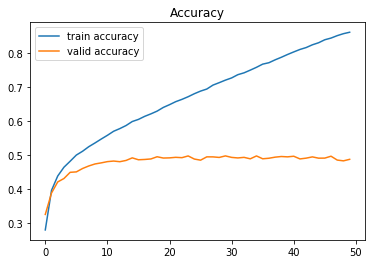

In [22]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

25

In [23]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_Accuracy", 
                          patience=25, 
                          verbose=1
                          )
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_7 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_8 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_9 (Batch (None, 128)               512       
__________

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 5s 104us/step - loss: 1.7300 - acc: 0.3991 - val_loss: 1.8076 - val_acc: 0.3759
Epoch 3/50
50000/50000 [==============================] - 5s 102us/step - loss: 1.6095 - acc: 0.4365 - val_loss: 1.6698 - val_acc: 0.4136
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 1.5365 - acc: 0.4625 - val_loss: 1.6323 - val_acc: 0.4305
Epoch 5/50
50000/50000 [==============================] - 5s 108us/step - loss: 1.4850 - acc: 0.4818 - val_loss: 1.5957 - val_acc: 0.4401
Epoch 6/50
50000/50000 [==============================] - 5s 105us/step - loss: 1.4377 - acc: 0.4973 - val_loss: 1.5640 - val_acc: 0.4511
Epoch 7/50
50000/50000 [==============================] - 5s 107us/step - loss: 1.3985 - acc: 0.5140 - val_loss: 1.5354 - val_acc: 0.4540
Epoch 8/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.3632 - acc: 0.5254 - val_loss: 1.5288 - val_acc: 0.4622
Epoch 9/50
50000/50000 [=====================

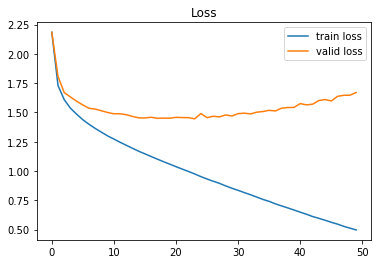

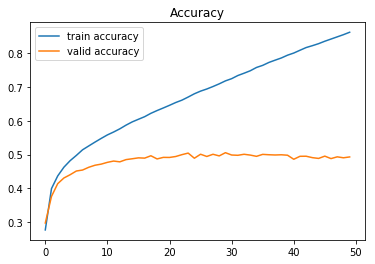

In [25]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [32]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor="val_Accuracy", 
                          patience=[10, 25], 
                          verbose=1
                          )
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_14 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_15 (Batc (None, 128)               512       
__________

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_Accuracy` which is not available. Available metrics are: val_loss,val_acc,loss,acc
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 5s 102us/step - loss: 1.7495 - acc: 0.3903 - val_loss: 1.7981 - val_acc: 0.3777
Epoch 3/50
50000/50000 [==============================] - 5s 104us/step - loss: 1.6219 - acc: 0.4326 - val_loss: 1.6816 - val_acc: 0.4132
Epoch 4/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.5459 - acc: 0.4592 - val_loss: 1.6372 - val_acc: 0.4264
Epoch 5/50
50000/50000 [==============================] - 5s 106us/step - loss: 1.4910 - acc: 0.4791 - val_loss: 1.6060 - val_acc: 0.4290
Epoch 6/50
50000/50000 [==============================] - 5s 101us/step - loss: 1.4442 - acc: 0.4952 - val_loss: 1.5676 - val_acc: 0.4429
Epoch 7/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.4033 - acc: 0.5103 - val_loss: 1.5474 - val_acc: 0.4561
Epoch 8/50
50000/50000 [==============================] - 5s 100us/step - loss: 1.3689 - acc: 0.5235 - val_loss: 1.5474 - val_acc: 0.4504
Epoch 9/50
50000/50000 [=====================

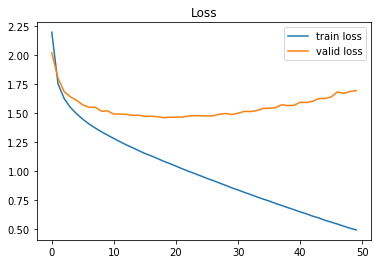

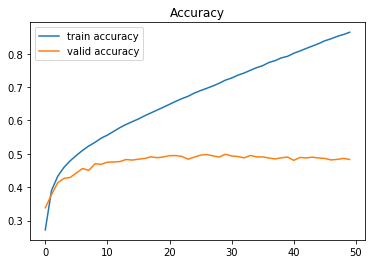

In [34]:
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()